Testing some strategies from this article 
[article](https://medium.com/colibritd-quantum/quantum-games-when-the-players-enjoy-entanglement-20a50aef255e)

In [1]:
from qiskit import QuantumCircuit, BasicAer, execute
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector, plot_state_qsphere
import numpy as np

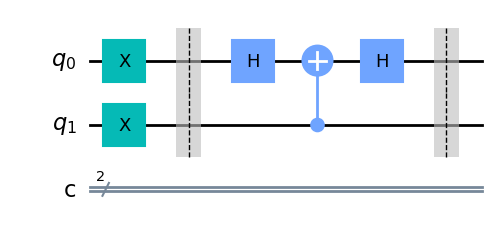

In [11]:
qc = QuantumCircuit(2, 2)

qc.x(0)
qc.x(1)

qc.barrier()

qc.h(0)
qc.cx(1, 0)
qc.h(0)

qc.barrier()
qc.draw("mpl")

In [12]:
st = Statevector(qc)
st.draw("latex")

<IPython.core.display.Latex object>

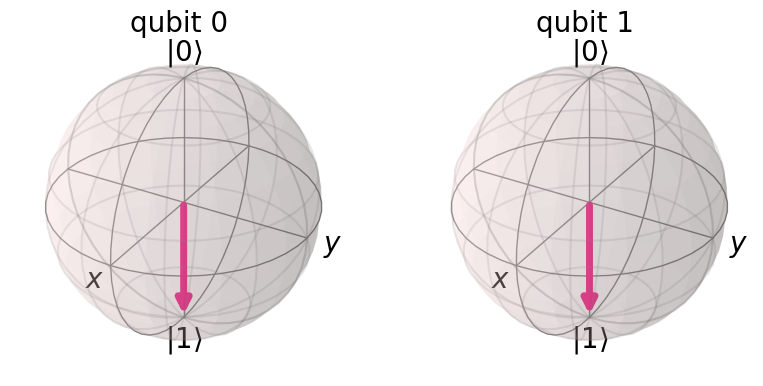

In [15]:
plot_bloch_multivector(st)

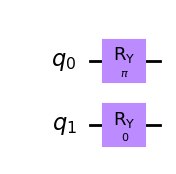

In [31]:
qc = QuantumCircuit(2)

'''
#same direction, same result
qc.ry(np.pi, 0)
qc.ry(np.pi, 1)

qc.ry(0, 0)
qc.ry(0, 1)
'''


'''
#opposite direction, different results
qc.ry(np.pi, 0)
qc.ry(0, 1)

qc.ry(0, 0)
qc.ry(np.pi, 1)
'''

qc.draw("mpl")

In [32]:
st = Statevector(qc)
st.draw("latex")

<IPython.core.display.Latex object>

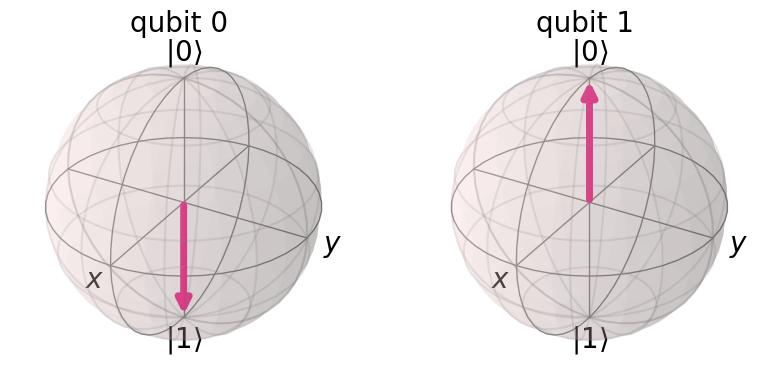

In [33]:
plot_bloch_multivector(st)

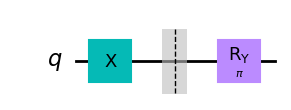

In [53]:
qc = QuantumCircuit(1)

qc.x(0)
qc.barrier()

qc.ry(np.pi, 0)

qc.draw("mpl")

In [51]:
st = Statevector(qc)
st.draw("latex")

<IPython.core.display.Latex object>

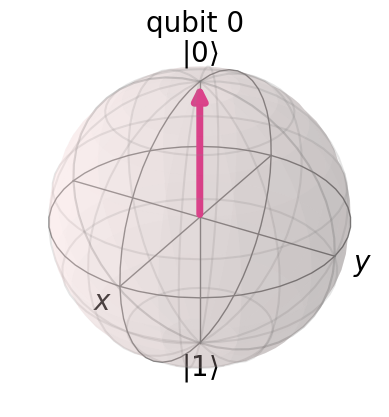

In [52]:
plot_bloch_multivector(st)

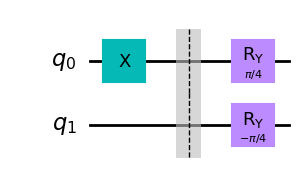

In [10]:
qc = QuantumCircuit(2)

qc.x(0)
#qc.x(1)
qc.barrier()
qc.ry(np.pi/4, 0)
qc.ry(-np.pi/4, 1)

qc.draw("mpl")

In [11]:
st = Statevector(qc)
st.draw("latex")

<IPython.core.display.Latex object>

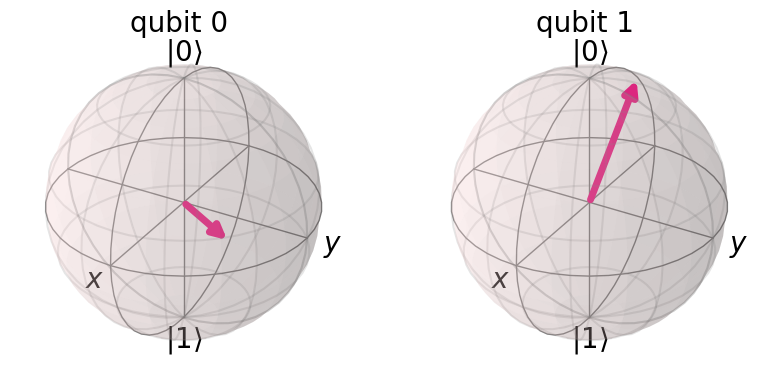

In [12]:
plot_bloch_multivector(st)

| x | y |   |  k m  | x * y |   | k^m |
|---|---|---|----   |-------|---|-----|
| 0 | 0 |   | 00-11 |   0   |   |  0  |
| 0 | 1 |   | 00-11 |   0   |   |  0  |
| 1 | 0 |   | 00-11 |   0   |   |  0  |
| 1 | 1 |   | 01-10 |   1   |   |  1  |

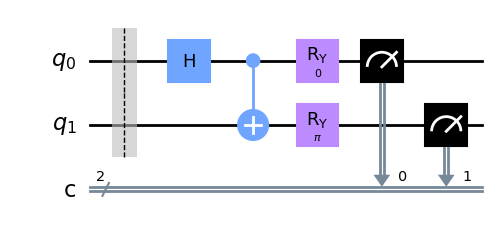

In [28]:
qc = QuantumCircuit(2, 2)

#qc.x(1)

qc.barrier()

qc.h(0)
qc.cx(0, 1)

qc.ry(0, 0)
qc.ry(np.pi, 1)

qc.measure([0, 1], [0,1])

qc.draw("mpl")

In [29]:
backend = BasicAer.get_backend('qasm_simulator')
execute(qc, backend=backend, shots=100).result().get_counts()

{'01': 53, '10': 47}

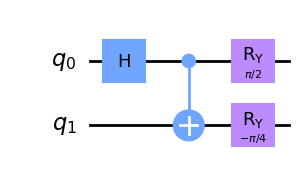

In [144]:
#https://github.com/qiskit-community/qiskit-community-tutorials/blob/master/awards/teach_me_qiskit_2018/chsh_game/CHSH%20game-tutorial.ipynb

#qc_test = QuantumCircuit(1)

### P(1) = sin**2(theta/2)  --> (sin(180/2)) **2 --> 1
### P(0) = cos**2(theta/2)  --> (cos(180/2)) **2 --> 0
#qc_test.ry(np.pi, 0)

### P(1) = sin**2(theta/2)  --> (sin(90/2)) **2 --> 0.7071...**2 --> 0.5
### P(0) = cos**2(theta/2)  --> (cos(90/2)) **2 --> 0.7071...**2 --> 0.5
#qc_test.ry(np.pi/2, 0)


### P(1) = sin**2(theta/2)  --> (sin(45/2))**2 --> 0.382683432365 --> ~0.15
### P(0) = cos**2(theta/2)  --> (cos(45/2))**2 --> 0.923879532511 --> ~0.85
#qc_test.ry(np.pi/4, 0)


###CHCS game

theta = lambda bit: 0 if not bit else np.pi/2
phi = lambda bit:  np.pi/4 if not bit else -np.pi/4

qc_test = QuantumCircuit(2)

qc_test.h(0)
qc_test.cx(0, 1)

qc_test.ry(theta(1), 0)
qc_test.ry(phi(1), 1)

qc_test.draw("mpl")

In [145]:
st = Statevector(qc_test)
st.draw("latex")

<IPython.core.display.Latex object>

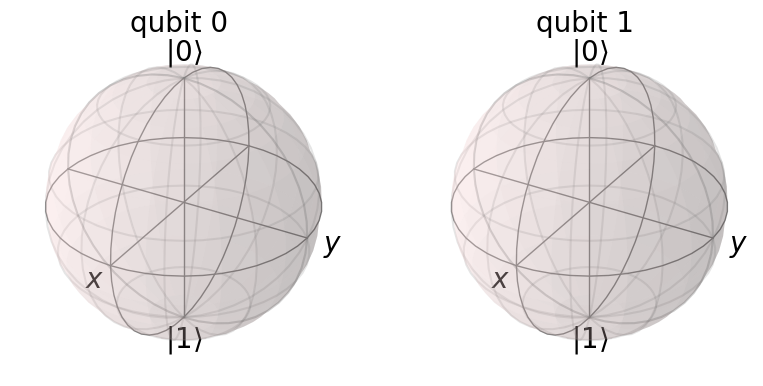

In [89]:
plot_bloch_multivector(st)